In [12]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
data = pd.read_csv("german_credit_data.csv", index_col=0)

In [16]:
#viewing the first 5 elements in the dataset
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [17]:
data.tail() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [19]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [18]:
#information about data variable types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [20]:
data.shape

(1000, 9)

In [21]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [22]:
print(data.nunique()) 

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [23]:
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})  

,Missing Records,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


In [24]:
data["Saving accounts"].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [25]:
data["Checking account"].value_counts(dropna = False) 

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [26]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True) 

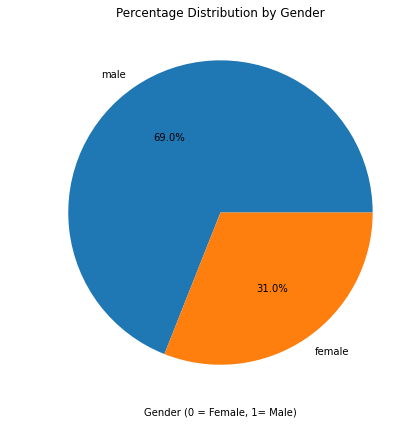

In [28]:
fig = plt.figure(figsize=(7,7))   # Gender distribution in the dataset
data['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Gender (0 = Female, 1= Male)")
plt.ylabel(" ", fontsize = 20)
plt.title("Percentage Distribution by Gender")
print("") 

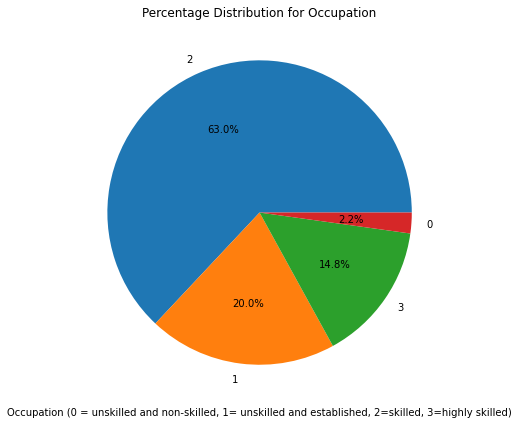

In [30]:
fig = plt.figure(figsize=(7,7))  # Occupational distribution in the dataset
data['Job'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Occupation (0 = unskilled and non-skilled, 1= unskilled and established, 2=skilled, 3=highly skilled)")
plt.ylabel(" ", fontsize = 20)
plt.title("Percentage Distribution for Occupation")
print("") 

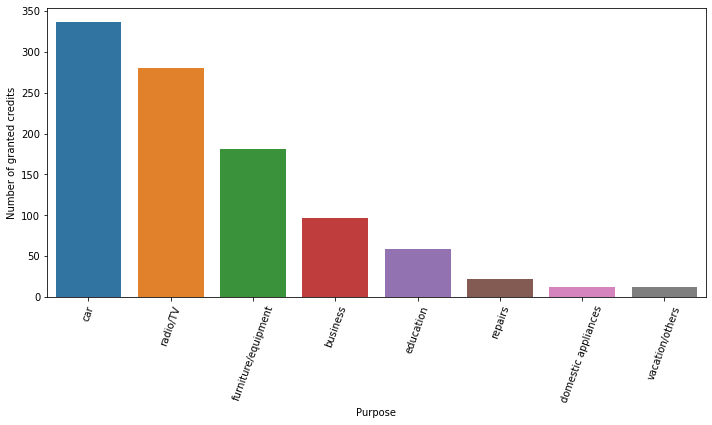

In [31]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()  # For what purpose the given loans are takenn shows.
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.ylabel("Number of granted credits")
plt.tight_layout()

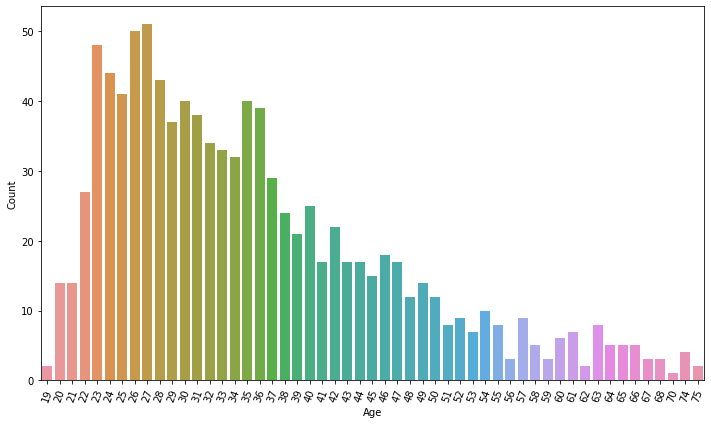

In [32]:
n_credits = data.groupby("Age")["Purpose"].count().rename("Count").reset_index()  # Shows the amount of credits given.
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Age",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.tight_layout()

In [33]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(15,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

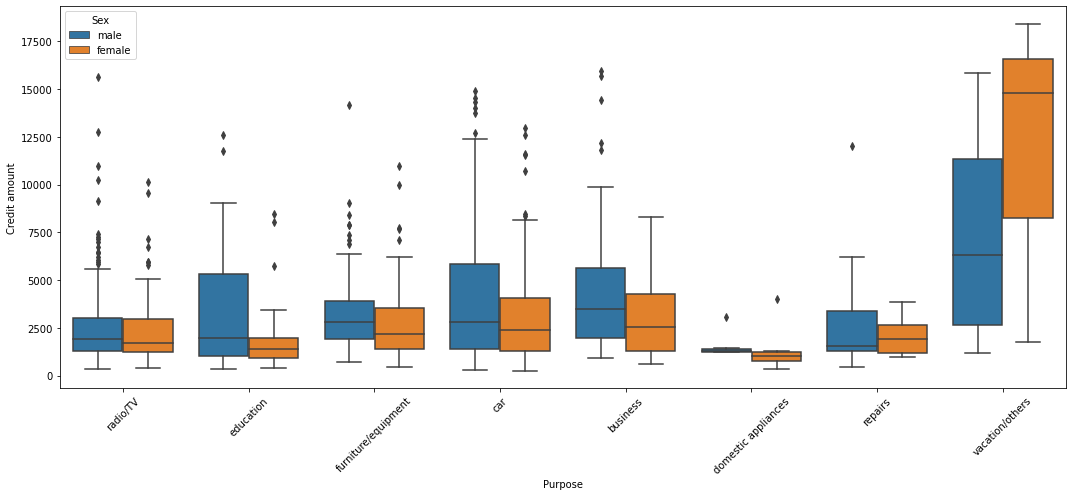

In [34]:
boxes("Purpose","Credit amount","Sex")

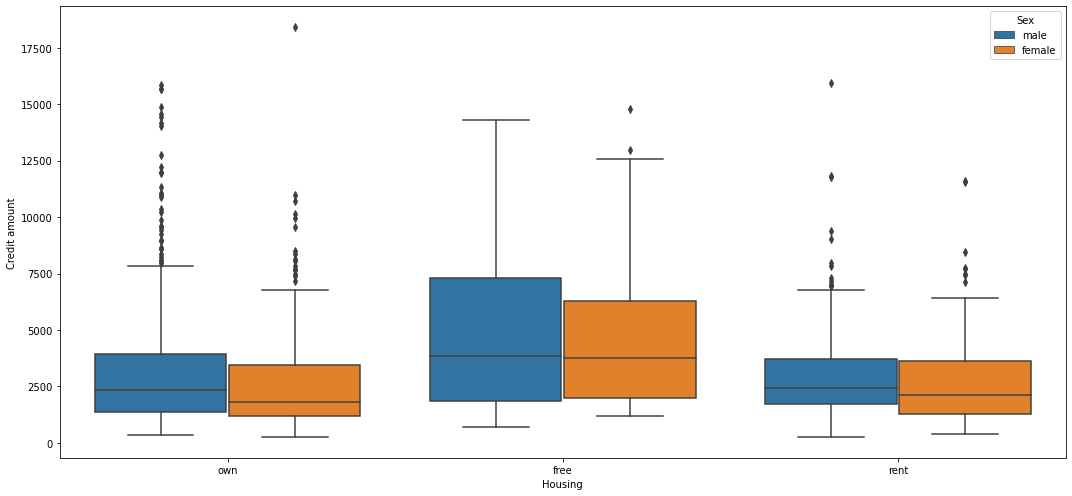

In [35]:
boxes("Housing","Credit amount","Sex",r=0)

In [40]:
data.rename(columns = {'Saving accounts': 'Saving_accounts'}, inplace=True)
data.rename(columns = {'Checking account': 'Checking_account'}, inplace=True)
data.rename(columns = {'Credit amount': 'Credit_amount'}, inplace=True)

In [41]:
print("Sex' : ",data['Sex'].unique())
print("Housing : ",data['Housing'].unique())
print("Saving_accounts : ",data['Saving_accounts'].unique())
print("Checking_account : ",data['Checking_account'].unique())
print("Purpose : ",data['Purpose'].unique())

Sex' :  [1 0]
Housing :  [1 0 2]
Saving_accounts :  ['little' 'quite rich' 'rich' 'moderate']
Checking_account :  ['little' 'moderate' 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [42]:
#Conversion of Categorical Variables

from sklearn import preprocessing   # Performing necessary actions for LabelEncoder
le = preprocessing.LabelEncoder()   # Structure of required operations for LabelEncoder
 
data['Sex'] = le.fit_transform(data['Sex'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving_accounts'] = le.fit_transform(data['Saving_accounts'])
data['Checking_account'] = le.fit_transform(data['Checking_account'])
data['Purpose'] = le.fit_transform(data['Purpose'])

data.head(5)  # We can see the numerical version of our dataset.

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Before applying the models, we separate our dataset into train and test.
# Train: data used, Test: data not used for training # it matters which test data we choose
# Random_state: Provides continuity by always generating the same number.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sex', axis=1), data['Sex'], test_size = 0.25, random_state=45)

In [57]:
#RANDOM FOREST ALGORITHM 
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 72.40%


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)

In [59]:
print("Accuracy : ",round(score*100, 2))

Accuracy :  72.4
